## Scrapping the tweets between 5th of December - 11st of December

Uncoment below line to re-scrap

In [1]:
# import twint
# import nest_asyncio

# nest_asyncio.apply()

# c = twint.Config()
# c.Username = "collegemenfess"
# c.Since = "2022-12-05"
# c.Until = "2022-12-11"
# c.Store_csv = True
# c.Output = "collegemenfess.csv"
# c.Limit = 5000
# c.Pandas = True

# twint.run.Search(c)

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("collegemenfess.csv")

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1603569991151804417,1603569991151804417,2022-12-16 08:57:33 WIB,2022-12-16,08:57:33,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1603569910097285120,1603569910097285120,2022-12-16 08:57:14 WIB,2022-12-16,08:57:14,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1603569275658448896,1603569275658448896,2022-12-16 08:54:42 WIB,2022-12-16,08:54:42,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1603569076390924289,1603569076390924289,2022-12-16 08:53:55 WIB,2022-12-16,08:53:55,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1603568860145528832,1603568860145528832,2022-12-16 08:53:03 WIB,2022-12-16,08:53:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
# remove other column except tweet

df = df[['tweet']]
df['real_tweet'] = df['tweet']

df.head()

,tweet,real_tweet
0,[cm] smt 5 mending ikut studi independen dulu ...,[cm] smt 5 mending ikut studi independen dulu ...
1,[cm] di kampus kalian mahasiswa s1 wajib publi...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,[CM] Dosen praktikum aku ngasih ini waktu pert...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,[cm] Alhamdulilah masih bisa hidup walaupun di...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [4]:
import re
def cleanTxt(text):
    text = re.sub(r'\[cm\]|\[CM\]|\[Cm\]|\[cM\]', '', text)
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    # lower case
    text = text.lower()
    return text

In [5]:
# Clean the tweets
df['tweet'] = df['tweet'].apply(cleanTxt)

df.head()

,tweet,real_tweet
0,smt mending ikut studi independen dulu apa ...,[cm] smt 5 mending ikut studi independen dulu ...
1,di kampus kalian mahasiswa s wajib publish j...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,bisa gk yh tugas uas ini ngerjain dirinya sen...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum aku ngasih ini waktu pertemua...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah masih bisa hidup walaupun dikasi...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [6]:
# tokenization
import nltk
from nltk.tokenize import word_tokenize
df['tweet'] = df['tweet'].apply(word_tokenize)

df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, pe...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, d...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [7]:
# stemming using sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['tweet'] = df['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, te...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, k...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [8]:
# remove stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df['tweet'] = df['tweet'].apply(lambda x: [stopword.remove(y) for y in x])
df.head()


,tweet,real_tweet
0,"[smt, mending, , studi, independen, , , magang...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[, kampus, , mahasiswa, , wajib, publish, jurn...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[, gk, yh, tugas, uas, , ngerjain, , , gausah,...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, , ngasih, , waktu, temu, ke...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, , , hidup, , kasi, , include, k...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [9]:
# remove empty list
df['tweet'] = df['tweet'].apply(lambda x: [y for y in x if y != ''])
df.head()


,tweet,real_tweet
0,"[smt, mending, studi, independen, magang, yaa,...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[kampus, mahasiswa, wajib, publish, jurnal, in...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, hidup, kasi, include, kos, kuli...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [10]:
# rejoin tweet into new column 
df['token'] = df['tweet']
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))
df.head()

,tweet,real_tweet,token
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,..."
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [11]:
# remove empty tweet
df = df[df['tweet'] != '']
df.head()

,tweet,real_tweet,token
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,..."
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [12]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['tweet'])
tfidf_matrix = tfidf.transform(df['tweet'])
tfidf_matrix.shape


(9847, 11543)

In [13]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

print(cosine_sim)

[[1.         0.10734858 0.         ... 0.         0.         0.02599238]
 [0.10734858 1.         0.         ... 0.01430253 0.         0.03313756]
 [0.         0.         1.         ... 0.         0.06082396 0.        ]
 ...
 [0.         0.01430253 0.         ... 1.         0.05280617 0.        ]
 [0.         0.         0.06082396 ... 0.05280617 1.         0.        ]
 [0.02599238 0.03313756 0.         ... 0.         0.         1.        ]]


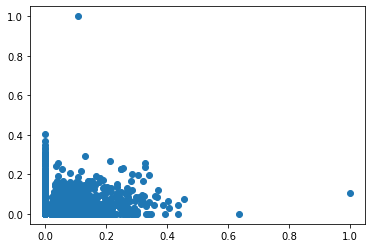

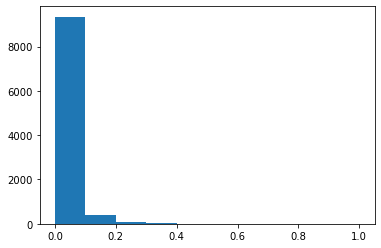

In [14]:
# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(cosine_sim[:,0], cosine_sim[:,1])
plt.show()

# plot histogram
plt.hist(cosine_sim[:,0])
plt.show()


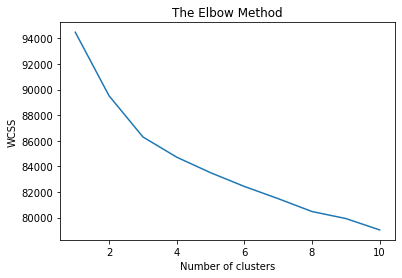

In [15]:
from sklearn.cluster import KMeans

# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cosine_sim)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
# kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim)
kmeans.labels_

#input label to dataframe
df['label'] = kmeans.labels_
df.head()





,tweet,real_tweet,token,label
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",1
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",1
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",0
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",0
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",0


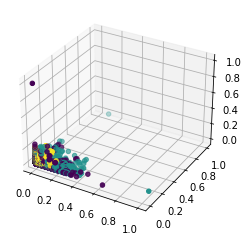

In [17]:

# plot scatter plot to 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cosine_sim[:,0], cosine_sim[:,1], cosine_sim[:,2], c=kmeans.labels_)
plt.show()

In [18]:
# count label
df['label'].value_counts()


0    5591
1    3428
2     828
Name: label, dtype: int64

In [19]:
# labelling each cluster with name 
# 0 = negative
# 1 = neutral
# 2 = positive

df["label"] = df["label"].replace({0: "negative", 1: "neutral", 2: "positive"})
df.head()

,tweet,real_tweet,token,label
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",neutral
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative


In [20]:
# pick 5 random tweet from each label

print("negative")
print(df[df['label'] == 'negative'].sample(10)['real_tweet'].values)

print()
print("neutral")
print(df[df['label'] == 'neutral'].sample(10)['real_tweet'].values)

print()
print("positive")
print(df[df['label'] == 'positive'].sample(10)['real_tweet'].values)



negative
['[cm] apakah ada disini mahasiswa TATA BUSANA UNNES angkatan 2021? Atau yang punya kenalan temen prodi dari univ itu dan angkatan itu juga.  Mohon bantuannya'
 '[cm] TW// KEKERASAN, KEKERASAN SEKSUAL Permisi, mau bertanya. Ada yang punya informasi ga terkait komunitas penyintas kekerasan seksual (Untuk keperluan tugas akhir)? Kalo ada, boleh dm aku, aku ada d reply'
 '[cm] permisii kakak-kakak ada yang anak unair gak? aku mau minta tolong download-in ini beh gaak :(  https://t.co/9meCrCw6mk'
 '[CM] kampus kalian kalau ligalisir gratis atau ada biayanya gaes?'
 '[cm] guys kan penelitianku itu kelas 3 smk. nah trnyata kelas 3 itu mau ujian. gimana ya ? apa ganti kelas 10 ajaa ? tapi aku udh bilang dospem kelas 3 😭😭'
 '[cm] Ada yang tau ini kenapa? Dan cara ngatasinnya gmn?  https://t.co/RP3zqzIOxO'
 '[cm] format sitasi kalo mau mengutip dari kutipan gimana ya gais'
 '[cm] teman teman maksud dari (2/158) dalam footnote itu apa ya  https://t.co/in06RNXADz'
 '[cm] selamat uas warg

In [21]:
# using word2vec to get vector representation of each word
from gensim.models import Word2Vec
model = Word2Vec(df['token'], min_count=1)



In [22]:
# represent each tweet with vector
def get_vector(text):
    vector = np.zeros(100)
    for word in text:
        vector += model.wv[word]
    return vector/len(text)

df['vector'] = df['token'].apply(get_vector)
df.head()

,tweet,real_tweet,token,label,vector
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.34097486320469117, 0.6359541474117173, 0.2..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.29300154528270167, 0.6350107292334238, 0.2..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2507528169080615, 0.44293550606817006, 0.0..."
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.22068944728622833, 0.6482621083656946, 0.2..."
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.16604037582874298, 0.37547360440450056, 0...."


In [23]:

# remove empty vector
# 
df = df[df['vector'].apply(lambda x: len(x) != 0)]
df.head()    




,tweet,real_tweet,token,label,vector
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.34097486320469117, 0.6359541474117173, 0.2..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.29300154528270167, 0.6350107292334238, 0.2..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2507528169080615, 0.44293550606817006, 0.0..."
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.22068944728622833, 0.6482621083656946, 0.2..."
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.16604037582874298, 0.37547360440450056, 0...."


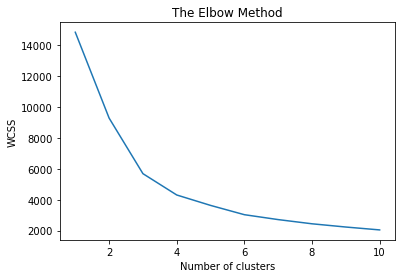

In [24]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df['vector'].values.tolist())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# kmeans with 3 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(df['vector'].values.tolist())
kmeans.labels_

#input label to dataframe
df['new_label'] = kmeans.labels_
df.head()



,tweet,real_tweet,token,label,vector,new_label
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",neutral,"[-0.34097486320469117, 0.6359541474117173, 0.2...",0
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",neutral,"[-0.29300154528270167, 0.6350107292334238, 0.2...",0
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",negative,"[-0.2507528169080615, 0.44293550606817006, 0.0...",0
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",negative,"[-0.22068944728622833, 0.6482621083656946, 0.2...",0
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",negative,"[-0.16604037582874298, 0.37547360440450056, 0....",1


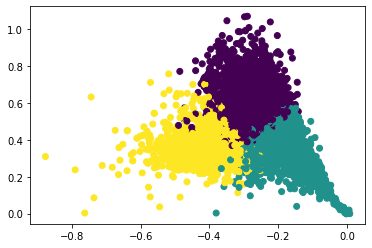

In [26]:
# plot vector to 2d plot
plt.scatter(df['vector'].apply(lambda x: x[0]), df['vector'].apply(lambda x: x[1]), c=kmeans.labels_)
plt.show()

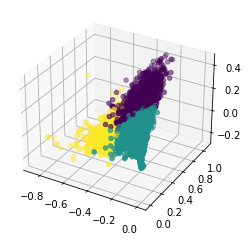

In [27]:
# plot vector to 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['vector'].apply(lambda x: x[0]), df['vector'].apply(lambda x: x[1]), df['vector'].apply(lambda x: x[2]), c=kmeans.labels_)
plt.show()

In [28]:
# count label
df['new_label'].value_counts()


0    4821
1    3844
2    1182
Name: new_label, dtype: int64

In [29]:
# get 10 random tweet from each label
print("0")
print(df[df['new_label'] == 0].sample(10)['real_tweet'].values)

print()
print("1")
print(df[df['new_label'] == 1].sample(10)['real_tweet'].values)

print()
print("2")
print(df[df['new_label'] == 2].sample(10)['real_tweet'].values)

0
['[cm] yg lagi skripsian, ngerjain bareng yuk. tentuin juga jadwal ngerjain bareng nya 😢'
 '[cm] Guys, jadi aku mau kirim tugas video lewat email, tp krn ukurannya gede jd mau tak masukin drive dlu, tp kok lama bgt ga ke upload". Ada saran gak, enaknya gimana ya? makasih sebelumnya'
 '[cm] Deadline jam 11 guys, dan aku blm apa apa. Itu 69 cuma soalnya aja🙂  https://t.co/Ss0dalGMAr'
 '[cm] guys mau nanya kalo pra penelitian itu angket yg di sebar hanya variabel y aja atau x juga? tia'
 '[Cm] kalo ngasih hadiah sempro biasanya kalian ngasih hadiah apa gais? Aku baru dikasi tau temenku tadi jam 12 kalo dia sidang sempro jam 1 aku harus bawa apa ya karrna mendadak banget, plis kasih sarannn, tia'
 '[CM] DOAIN SENDER BISA SIDANG BULAN INI SOALNYA TERAKHIR DAFTAR TANGGAL 10 DAN BARU KEMAREN DOSBING SENDER IKUT GERCEP JUGA SETELAH DIANGGURIN SEBULAN 😭👍🏻  UDAH DAPET ACC TINGGAL MINTA TTD TERUS KIRIM AAAAAAAA TAKUT GAK KEKEJARRRRR.'
 '[Cm] temen temen, minta tolong bantu doanya dong biar sida

In [30]:
# add real tweet and new label to csv
df[['real_tweet', 'new_label']].to_csv('tweet.csv', index=False)
